In [2]:
import numpy as np
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0-rc1'

In [4]:
x_train = []
t_train = []
x_test = []
t_test = []

mu, sigma = 1, 0.1

for i in range(0,2000):
    data = np.array([0,0,0])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([1,0,0,0,0,0,0,0])
    
    data = np.array([0,0,1])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,1,0,0,0,0,0,0])      
    
    data = np.array([0,1,0])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,0,1,0,0,0,0,0])
      
    data = np.array([0,1,1])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,0,0,1,0,0,0,0])
    
    data = np.array([1,0,0])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,0,0,0,1,0,0,0])
     
    data = np.array([1,0,1])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,0,0,0,0,1,0,0])
    
    data = np.array([1,1,0])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,0,0,0,0,0,1,0])
    
    data = np.array([1,1,1])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,0,0,0,0,0,0,1])

for i in range(0,500):
    data = np.array([0,0,0])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([1,0,0,0,0,0,0,0])
    
    data = np.array([0,0,1])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,1,0,0,0,0,0,0])
    
    data = np.array([0,1,0])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,0,1,0,0,0,0,0])
    
    data = np.array([0,1,1])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,0,0,1,0,0,0,0])
    
    data = np.array([1,0,0])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,0,0,0,1,0,0,0])
    
    data = np.array([1,0,1])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,0,0,0,0,1,0,0])
    
    data = np.array([1,1,0])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,0,0,0,0,0,1,0])
    
    data = np.array([1,1,1])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,0,0,0,0,0,0,1])


x_train = np.array(x_train)
t_train = np.array(t_train)

x_test = np.array(x_test)
t_test = np.array(t_test)

print(x_train.shape)
print(t_train.shape)

print(x_test.shape)
print(t_test.shape)

(16000, 3)
(16000, 8)
(4000, 3)
(4000, 8)


In [6]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, t_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, t_test)).batch(32)

## Keras initializers

- glorot_normal : Xavior init Gaussian
- glorot_uniform : Xavior init Uniform


- he_normal : He init Gaussian
- he_uniform : He init Uniform

In [7]:
kernel_initializer1 = tf.keras.initializers.he_normal(seed=None)
kernel_initializer2 = tf.keras.initializers.he_uniform(seed=None)
kernel_initializer3 = tf.keras.initializers.glorot_normal(seed=None)
kernel_initializer4 = tf.keras.initializers.glorot_uniform(seed=None)

In [8]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=3),
    tf.keras.layers.Dense(5,
                          kernel_initializer=kernel_initializer2,
                          activation='relu'),
    tf.keras.layers.Dense(8,
                          kernel_initializer=kernel_initializer2,
                          activation='softmax')
])

loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD()

In [9]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 48        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [11]:
@tf.function
def train_step(data, labels):
    with tf.GradientTape() as tape:
        predictions = model(data)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)
    
@tf.function
def test_step(data, labels):
    predictions = model(data)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [12]:
EPOCHS = 100

tr_loss = []
tr_acc = []
te_loss = []
te_acc = []

for epoch in range(EPOCHS):
    for data, labels in train_ds:
        train_step(data, labels)

    for test_data, test_labels in test_ds:
        test_step(test_data, test_labels)

    template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'
    print(template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))
    
    tr_loss.append(train_loss.result())
    tr_acc.append(train_accuracy.result()*100)
    te_loss.append(test_loss.result())
    te_acc.append(test_accuracy.result()*100)

W1004 19:47:20.293593 25856 base_layer.py:1814] Layer dense is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

W1004 19:47:20.355593 25856 deprecation.py:323] From C:\Users\woals\AppData\Local\conda\conda\envs\alpha\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future ve

에포크: 1, 손실: 0.44052863121032715, 정확도: 87.4234390258789, 테스트 손실: 0.4085606038570404, 테스트 정확도: 87.5
에포크: 2, 손실: 0.41530168056488037, 정확도: 87.46171569824219, 테스트 손실: 0.3922309875488281, 테스트 정확도: 87.5
에포크: 3, 손실: 0.39952677488327026, 정확도: 87.47447967529297, 테스트 손실: 0.38197362422943115, 테스트 정확도: 87.5
에포크: 4, 손실: 0.3889743387699127, 정확도: 87.4810562133789, 테스트 손실: 0.3748856484889984, 테스트 정확도: 87.50077819824219
에포크: 5, 손실: 0.38133704662323, 정확도: 87.48780822753906, 테스트 손실: 0.36945146322250366, 테스트 정확도: 87.50875091552734
에포크: 6, 손실: 0.37528079748153687, 정확도: 87.51666259765625, 테스트 손실: 0.3648800849914551, 테스트 정확도: 87.58229064941406
에포크: 7, 손실: 0.37015777826309204, 정확도: 87.60356903076172, 테스트 손실: 0.3608230948448181, 테스트 정확도: 87.70803833007812
에포크: 8, 손실: 0.36563464999198914, 정확도: 87.72197723388672, 테스트 손실: 0.35709598660469055, 테스트 정확도: 87.83711242675781
에포크: 9, 손실: 0.36151033639907837, 정확도: 87.84253692626953, 테스트 손실: 0.35358095169067383, 테스트 정확도: 87.95173645019531
에포크: 10, 손실: 0.35765114426612854,

에포크: 75, 손실: 0.20616717636585236, 정확도: 92.72117614746094, 테스트 손실: 0.20358751714229584, 테스트 정확도: 92.77991485595703
에포크: 76, 손실: 0.204883873462677, 정확도: 92.75452423095703, 테스트 손실: 0.2023276835680008, 테스트 정확도: 92.81253814697266
에포크: 77, 손실: 0.203616663813591, 정확도: 92.78699493408203, 테스트 손실: 0.2010832577943802, 테스트 정확도: 92.84432220458984
에포크: 78, 손실: 0.20236451923847198, 정확도: 92.81861114501953, 테스트 손실: 0.1998530924320221, 테스트 정확도: 92.87527465820312
에포크: 79, 손실: 0.20112645626068115, 정확도: 92.84943389892578, 테스트 손실: 0.19863605499267578, 테스트 정확도: 92.90546417236328
에포크: 80, 손실: 0.19990119338035583, 정확도: 92.87947845458984, 테스트 손실: 0.19743096828460693, 테스트 정확도: 92.93488311767578
에포크: 81, 손실: 0.1986876130104065, 정확도: 92.90876007080078, 테스트 손실: 0.19623686373233795, 테스트 정확도: 92.96358489990234
에포크: 82, 손실: 0.1974848210811615, 정확도: 92.93731689453125, 테스트 손실: 0.19505275785923004, 테스트 정확도: 92.9915771484375
에포크: 83, 손실: 0.19629180431365967, 정확도: 92.96516418457031, 테스트 손실: 0.193877711892128, 테스트 정확도: 93.0

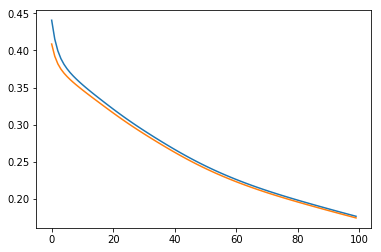

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(tr_loss)
plt.plot(te_loss)

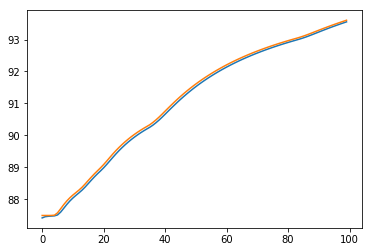

In [14]:
plt.plot(tr_acc)
plt.plot(te_acc)